***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-07-02**

On this paper, I use Iris dataset and Email dataset

Bayes Theorem formula:
    P(y|X) = P(X|y) * P(y) / P(X)

- P(y|X) : Posterior probability
- P(X|y) : Likelihood
- P(y)   : Prior probability
- P(X)   : Independence, we can ignore this

# Implementation

In [157]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns

np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [215]:
# load iris dataset
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, random_state=0)
class_names = iris.target_names

# load spambase
emails = pd.read_csv(r"C:\Users\ACER\Downloads\spambase.data")
emails = emails.to_numpy()
labels = emails[:, -1].astype(np.uint8)
emails = emails[:, :-1]
E_train, E_test, train_labels, test_labels = train_test_split(emails, labels, test_size=.2, shuffle=True, random_state=0)
email_class_names = ['not_spam', 'spam']

In [216]:
print(train_labels)

[1 1 1 ... 1 0 0]


In [210]:
print(test_labels)

[1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 

In [133]:
# Support Functions

# Kỳ vọng
def mean(vals):
    return np.mean(vals, axis=0)

# Phương sai
def variance(vals):
    """
    Tại sao lại chia cho (n - 1) mà không phải chia cho n?
      - Trong nhiều tình huống thực tế, phương sai thực sự của một tập hợp 
      không được biết trước và phải được tính toán bằng cách nào đó. 
      - Khi tính toán phương sai mẫu để ước tính phương sai tổng thể, mẫu số 
      của phương trình phương sai tđược đổi thành (n - 1) để ước lượng không
      bị thiên vị và không đánh giá thấp phương sai tổng thể.
    """
    E = mean(vals)
    variance = np.sum((vals - E)**2, axis=0) / (len(vals) - 1)
    return variance

# Độ lêch chuẩn
def deviation(vals):
    return variance(vals) ** 0.5

# Gaussian density function (Hàm mật độ Gauss)
def cal_Gaussian_density(x, mean, var):
    temp = np.exp(-((x - mean) ** 2) / (2 * var))
    return 1.0/np.sqrt(2 * np.pi * var) * temp

# posterior probabilities
def cal_posterior(self, x):
    posteriors = []
    for i in range(self.count):
        prior = np.log(self.prior[i])
        conditional = np.sum(np.log(self.gaussian_density(i, x)))
        posterior = prior + conditional
        posteriors.append(posterior)
    return self.classes[np.argmax(posteriors)]

def group_by(X, y, op):
    nC = np.unique(y)
    C = len(np.unique(y))
    ans = np.zeros((C, X.shape[1]))
    for i in nC:
        temp = X[y == i, :]
        ans[i, :] = op(temp)

    return ans


In [99]:
class NaiveBayesClassifier:
    """
    Naive Bayes Classifier with Normal Distribution
    """

    def __init__(self):
        self.mean = None
        self.var = None
        self.dev = None
        self.prior = None

    # Thống kê xác suất
    def __do_statistic(self, X, y):
        self.mean = group_by(X, y, mean)
        self.var = group_by(X, y, variance)
        self.dev = self.var ** 0.5

    # Prior probabilities
    def __cal_prior(self, y):
        self.prior = np.unique(y, return_counts=True)[1] / len(y)

    # Posterior probabilities
    def __cal_posterior(self, x):
        """
        Calculate posterior probabilities of X (one datapoint) belong to classes

        Args:
            x (_type_): _description_

        Returns:
            _type_: _description_
        """
        posteriors = []
        for i in range(self.n_classes):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(cal_Gaussian_density(x, self.mean[i], self.var[i])))
            posterior = prior + conditional
            posteriors.append(posterior)
        
        return np.argmax(posteriors)

    def fit(self, X, y, target_names=None):
        self.classes = target_names
        self.n_classes = len(np.unique(y))

        self.__do_statistic(X, y)
        self.__cal_prior(y)

    def predict(self, X, return_classnames=False):
        predicted_output = [self.__cal_posterior(dt) for dt in X]
        if self.classes is None or return_classnames == False:
            return np.asarray(predicted_output)
        else:
            return np.array([self.classes[i] for i in predicted_output])


## Iris dataset

Visualize Iris dataset

In [111]:
iris_df = pd.DataFrame({'sepal.length': iris.data[:, 0],
                        'sepal.width': iris.data[:, 1],
                        'petal.length': iris.data[:, 2],
                        'petal.width': iris.data[:, 3],
                        'variety': [iris.target_names[i] for i in iris.target]})
print(class_names)
iris_df

['setosa' 'versicolor' 'virginica']


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Training Model

In [112]:
model = NaiveBayesClassifier()

model.fit(X_train, y_train, target_names=class_names)

In [123]:
# training data

y_train_pred = model.predict(X_train, return_classnames=False)

print(y_train_pred)
print()
print(f'Training accuracy: {round(accuracy_score(y_train_pred, y_train) * 100, 2)}%')


[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 2 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 2 0 1 2 2 0 1 1
 2 1 0 0 0 2 1 2 0]

Training accuracy: 95.0%


In [124]:
# test data

y_pred = model.predict(X_test)

print(y_pred)
print()
print(f'Testing accuracy: {round(accuracy_score(y_pred, y_test) * 100, 2)}%')


[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]

Testing accuracy: 96.67%


## Spam email dataset

In [217]:
model_email = NaiveBayesClassifier()

model_email.fit(E_train, train_labels, target_names=email_class_names)

In [219]:
# training data

train_labels_pred = model_email.predict(E_train, return_classnames=False)

print(train_labels_pred)
print()
print(f'Training accuracy: {round(accuracy_score(train_labels_pred, train_labels) * 100, 2)}%')


[1 1 1 ... 1 1 0]

Training accuracy: 81.71%


In [222]:
print(model_email.mean)

[[7.72044444e-02 2.42835556e-01 2.00182222e-01 5.06666667e-04
  1.74680000e-01 4.61733333e-02 9.65333333e-03 4.05688889e-02
  3.64888889e-02 1.65497778e-01 2.21644444e-02 5.36711111e-01
  5.82177778e-02 4.32088889e-02 7.32888889e-03 6.10133333e-02
  5.06577778e-02 9.09733333e-02 1.28929333e+00 8.70666667e-03
  4.52133333e-01 3.99422222e-02 7.21333333e-03 1.79644444e-02
  8.53693333e-01 4.32204444e-01 1.23763556e+00 1.73168889e-01
  1.47253333e-01 1.56746667e-01 9.93377778e-02 6.90533333e-02
  1.51613333e-01 6.94488889e-02 1.54906667e-01 1.29626667e-01
  1.89457778e-01 2.26977778e-02 1.16004444e-01 7.45111111e-02
  7.74577778e-02 2.11266667e-01 6.88222222e-02 1.19382222e-01
  4.30040000e-01 3.01475556e-01 8.18666667e-03 5.25866667e-02
  4.36666667e-02 1.54530667e-01 2.06622222e-02 1.14828000e-01
  1.10693333e-02 2.22786667e-02 2.27649733e+00 1.77422222e+01
  1.62249333e+02]
 [1.55041958e-01 1.66335664e-01 4.06069930e-01 1.80195804e-01
  5.17783217e-01 1.67986014e-01 2.69818182e-01 2.015

In [223]:
print(train_labels)

[1 1 1 ... 1 0 0]


In [224]:
# test data

pred_labels = model_email.predict(E_test)

print(pred_labels)
print()
print(f'Testing accuracy: {round(accuracy_score(pred_labels, test_labels) * 100, 2)}%')

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 

# Evaluating model

Training


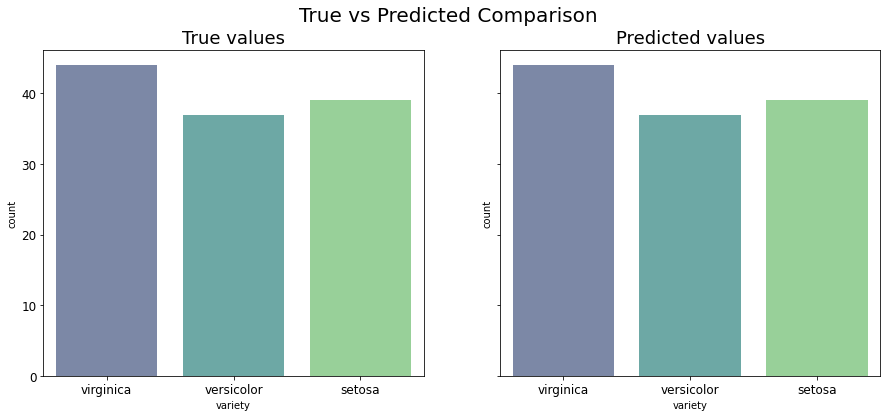

Test


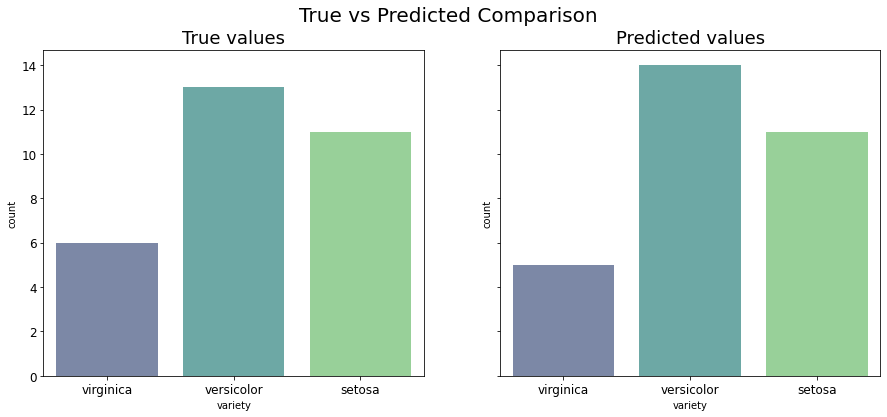

In [173]:
def visualize(true_classes, predicted_classes, class_names, column_name):
    if class_names is not None:
        t_c = [class_names[i] for i in true_classes]
        p_c = [class_names[i] for i in predicted_classes]
    else:
        t_c = true_classes
        p_c = predicted_classes
    tr_c = pd.DataFrame(data=t_c, columns=[column_name])
    pr_c = pd.DataFrame(data=p_c, columns=[column_name])
    
    fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
    
    sns.countplot(x=column_name, data=tr_c, ax=ax[0], palette='viridis', alpha=0.7, dodge=False)
    sns.countplot(x=column_name, data=pr_c, ax=ax[1], palette='viridis', alpha=0.7, dodge=False) 

    fig.suptitle('True vs Predicted Comparison', fontsize=20)

    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    ax[0].set_title("True values", fontsize=18)
    ax[1].set_title("Predicted values", fontsize=18)
    plt.show()

print("Training")
visualize(y_train, y_train_pred, class_names, 'variety')
print("Test")
visualize(y_test, y_pred, class_names, 'variety')

Training


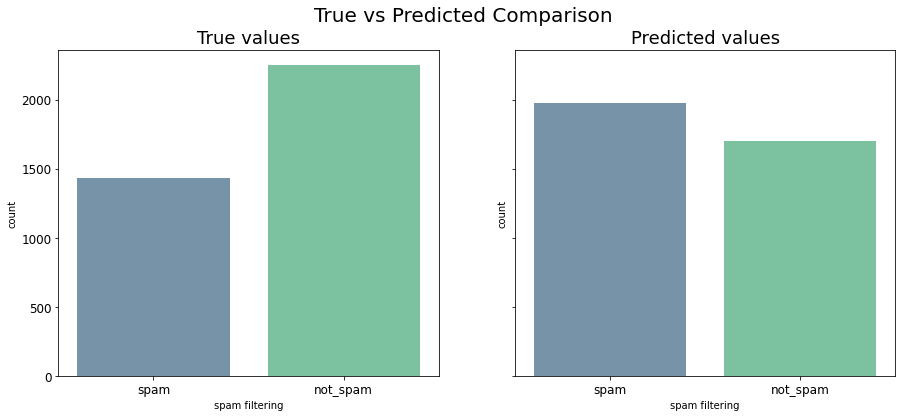

Test


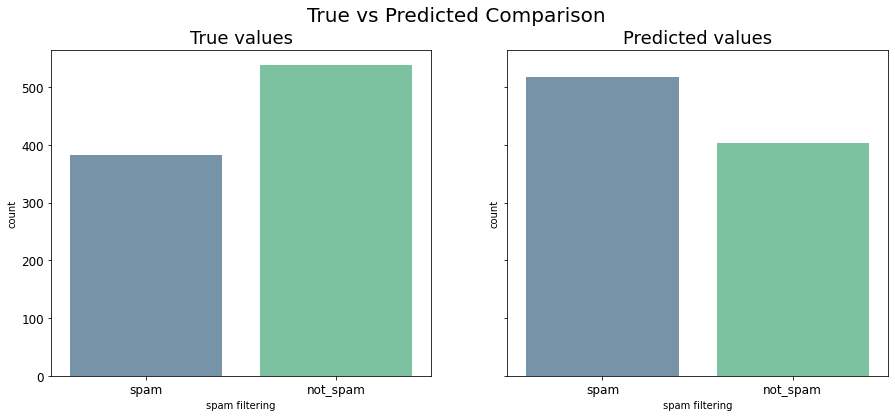

In [174]:
print("Training")
visualize(train_labels, train_labels_pred, email_class_names, 'spam filtering')
print("Test")
visualize(test_labels, pred_labels, email_class_names, 'spam filtering')